<a href="https://colab.research.google.com/github/santidelaga/Language-Detection/blob/main/language_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import re          #regular expression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
path = "/content/drive/MyDrive/Language_Detection[1].csv"
data = pd.read_csv(path)

data.head(10)
#data = pd.read_csv("./Language Detection.csv")
#data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts() #value_counts() is used to get a Series containing counts of unique values.

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
#Separating Independent and Dependent features
X = data["Text"]
y = data["Language"]

#Label Encoding to convert it into a numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

TEXT PREPROCESSING

In [6]:
data_list = []

# iterating through all the text
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()          # converting the text to lower case
    data_list.append(text)       # appending to data_list

In [7]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # tokenize a collection of text documents
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [8]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [9]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [12]:
print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


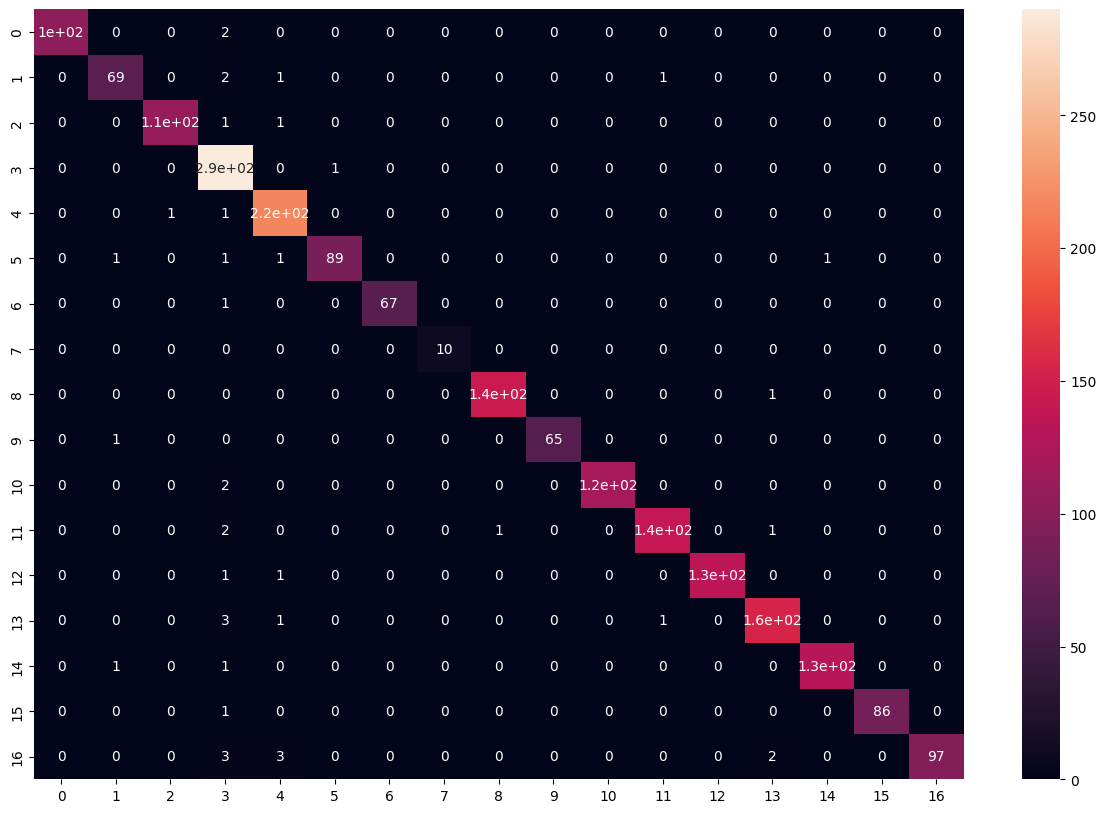

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [14]:
#Predicting with some more data

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The language is in",lang[0]) # printing the language

In [15]:
predict('People are awesome')

The language is in English


In [16]:
predict('Eu beibo leixe')

The language is in Portugeese


In [17]:
predict('നൽകുന്നു')

The language is in Malayalam


In [18]:
predict('Les table e rouge')

The language is in French


In [19]:
pip install google_trans_new

In [20]:
pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 18.3 MB/s eta 0:00:00


In [21]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.2.2-2.1ubuntu2.5).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 188 kB of archives.
After this operation, 926 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudiocpp0 amd64 19.6.0-1build1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 portaudio19-dev amd64 19.6.0-1build1 [106 kB]
Fetched 188 kB in 1s (301 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 123069 files and directories currently installe

In [22]:
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream


In [23]:
pip install ffmpeg-python

In [24]:
audio = record(6)   #will record for 5 seconds


Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [25]:
type(audio)


bytes

In [26]:
import IPython.display as ipd

ipd.display(ipd.Audio(audio))

In [27]:
testAudio = type(audio)

In [28]:
import speech_recognition as sr
#print(sr.Microphone.list_microphone_names()) #print all the microphones connected to your machine

In [29]:
# initialize the recognizer
r = sr.Recognizer()

In [30]:
pip install SpeechRecognition pydub


In [31]:
# open the file
with sr.AudioFile("/content/testAudio.wav") as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

FileNotFoundError: ignored

In [ ]:
predict('hello I am ready to work thank you')

In [ ]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [ ]:
# Detect the language of the sentence
from langdetect import detect
sentence = "Tanzania ni nchi inayoongoza kwa utalii barani afrika"
detect(sentence)

In [ ]:
# translate a sentence from swahili to english langauge

from google_trans_new import google_translator

translator = google_translator()
sentence = "Tanzania ni nchi inayoongoza kwa utalii barani afrika"
translate_text = translator.translate(sentence,lang_tgt='en')
print(translate_text)

In [ ]:
from google_trans_new import google_translator

translator = google_translator()

sentence = "Tanzania ni nchi inayoongoza kwa utalii barani afrika"
translate_text = translator.translate(sentence,lang_tgt='en')

print(translate_text)